In [9]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import json
import numpy as np
from tqdm import tqdm
from utils import *

cls = ['good', 'tear']
folders = ["train_test_splited_data/train", "train_test_splited_data/test"]
# folders = ["train_test_splited_data/test"]

train_indexing = os.listdir(f"{folders[0]}/images")
print(train_indexing)
train_good_indexing = [i for i in train_indexing if 'good' in i]
print(len(train_good_indexing))
train_tear_indexing = [i for i in train_indexing if 'tear' in i]
print(len(train_tear_indexing))
train_good_indexing = [int(i.split('_')[-1].split('.')[0]) for i in train_good_indexing]
train_tear_indexing = [int(i.split('_')[-1].split('.')[0]) for i in train_tear_indexing]

test_indexing = os.listdir(f"{folders[1]}/images")
print(test_indexing)
test_good_indexing = [i for i in test_indexing if 'good' in i]
print(len(test_good_indexing))
test_tear_indexing = [i for i in test_indexing if 'tear' in i]
print(len(test_tear_indexing))
test_good_indexing = [int(i.split('_')[-1].split('.')[0]) for i in test_good_indexing]
test_tear_indexing = [int(i.split('_')[-1].split('.')[0]) for i in test_tear_indexing]



['good_363.png', 'good_274.png', 'good_379.png', 'good_344.png', 'good_538.png', 'good_839.png', 'good_934.png', 'good_973.png', 'good_406.png', 'tear_21.png', 'good_843.png', 'good_368.png', 'good_604.png', 'good_783.png', 'good_390.png', 'good_701.png', 'good_560.png', 'good_553.png', 'good_494.png', 'good_879.png', 'good_694.png', 'good_769.png', 'good_409.png', 'good_472.png', 'good_550.png', 'good_381.png', 'good_225.png', 'good_284.png', 'good_831.png', 'good_569.png', 'good_949.png', 'good_656.png', 'good_331.png', 'good_327.png', 'good_594.png', 'tear_23.png', 'good_266.png', 'good_238.png', 'good_932.png', 'good_314.png', 'good_392.png', 'good_961.png', 'good_248.png', 'good_521.png', 'good_857.png', 'good_383.png', 'good_622.png', 'good_626.png', 'good_755.png', 'good_452.png', 'good_211.png', 'good_398.png', 'good_557.png', 'good_212.png', 'good_624.png', 'good_902.png', 'good_796.png', 'good_201.png', 'good_960.png', 'good_319.png', 'good_784.png', 'good_761.png', 'good_478

In [ ]:
for folder in folders:
    !rm -rf {folder}/annotations

for folder in folders:
    if folder == folders[0]:
        good_indexing = train_good_indexing
        tear_indexing = train_tear_indexing
    else:
        good_indexing = test_good_indexing
        tear_indexing = test_tear_indexing
    Anotate(folder, good_indexing, cls[0])
    Anotate(folder, tear_indexing, cls[1])

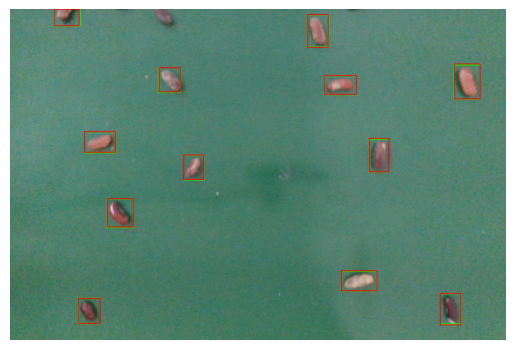

In [10]:
for folder in folders:    
    index = 1
    tear_img_path = f"{folder}/images/tear_{index}.png"
    tear_txt_path1 = f"{folder}/labels/tear_{index}.txt"
    tear_txt_path2 = f"{folder}/predict/tear_{index}.txt"
    tear_json_path = f"{folder}/annotations/tear_{index}.json"

    txt_paths = []
    if os.path.exists(tear_txt_path1):
        txt_paths.append(tear_txt_path1)
    if os.path.exists(tear_txt_path2):
        txt_paths.append(tear_txt_path2)

    if txt_paths:
        draw_boxes_and_save_to_json(folder, tear_img_path, txt_paths, tear_json_path, index, cls[1], show=True, save=False)



In [4]:
for folder in folders:
    print(len(os.listdir(f'{folder}/annotations/{cls[0]}/img')),len(os.listdir(f'{folder}/annotations/{cls[1]}/img')))

5217 668
1218 194


In [5]:
# list images have IoU score more than f%

f = [0.5, 0.7, 0.9]

for folder in folders:
    print(f"Folder: {folder}")
    for i in f:
        print(f"IoU score > {i}")
        print("Good")
        list_images(folder, cls[0], i)
        print("Tear")
        list_images(folder, cls[1], i)

Folder: train_test_splited_data/train
IoU score > 0.5
Good
5199
Tear
666
IoU score > 0.7
Good
5182
Tear
648
IoU score > 0.9
Good
4615
Tear
509
Folder: train_test_splited_data/test
IoU score > 0.5
Good
1218
Tear
168
IoU score > 0.7
Good
1218
Tear
168
IoU score > 0.9
Good
1125
Tear
141


In [6]:
def get_min_max_IoU(folder, cls):
    import re
    index = [int(re.findall(r'\d+', i)[0]) for i in os.listdir(f"{folder}/annotations/{cls}/anot")]
    min_IoU = 1
    max_IoU = 0
    for i in index:
        with open(f"{folder}/annotations/{cls}/anot/{i}.json") as json_file:
            data = json.load(json_file)
            for key in data:
                if data[key]['IoU'] < min_IoU:
                    min_IoU = data[key]['IoU']
                if data[key]['IoU'] > max_IoU:
                    max_IoU = data[key]['IoU']
    return min_IoU, max_IoU

for folder in folders:
    print(f"Folder: {folder}")
    min_IoU, max_IoU = get_min_max_IoU(folder, cls[0])
    # cls[0] = good
    print(min_IoU, max_IoU)
    min_IoU, max_IoU = get_min_max_IoU(folder, cls[1])
    # cls[1] = tear
    print(min_IoU, max_IoU)

Folder: train_test_splited_data/train
0.32833020637898686 1.0
0.312809099901088 1.0
Folder: train_test_splited_data/test
0.7526344980587909 1.0
0.041681901279707494 0.9903846153846154


In [7]:
good_train_images = list_images(folders[0], cls[0], 0.5)
tear_train_images = list_images(folders[0], cls[1], 0.5)
good_test_images = list_images(folders[1], cls[0], 0.5)
tear_test_images = list_images(folders[1], cls[1], 0.5)

5199
666
1218
168
